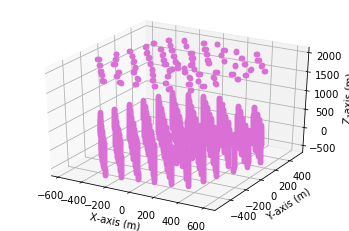

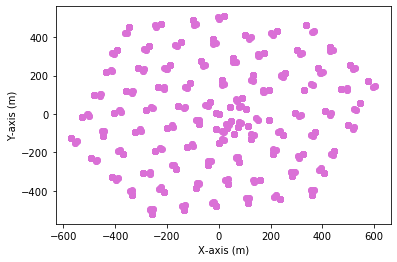

In [1]:
import sys, os
from icecube import icetray, dataclasses, dataio
from I3Tray import I3Tray
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

gcdFile = dataio.I3File('/cvmfs/icecube.opensciencegrid.org/data/GCD/GeoCalibDetectorStatus_2020.Run134142.Pass2_V0.i3.gz')
frame = gcdFile.pop_frame()

while not frame.Has('I3Geometry'):
    frame = gcdFile.pop_frame()
geometry = frame.Get('I3Geometry')
om_geometry = geometry.omgeo

#creates an 87 row by 67 column array with 0's in all positions
dom_x_positions=np.zeros((87,67))
dom_y_positions=np.zeros((87,67))
dom_z_positions=np.zeros((87,67))

#for loop puts the x,y,z positions into an array, that can be accessed via [string number, DOM number on that string number]
for om, geo_info in om_geometry:
    dom_x_positions[om[0],om[1]]=geo_info.position.x
    dom_y_positions[om[0],om[1]]=geo_info.position.y
    dom_z_positions[om[0],om[1]]=geo_info.position.z
#print(dom_x_positions[3,4], dom_y_positions[3,4], dom_z_positions[3,4])

#the following 3 for loops creates a list of (x,y,z) coordinates for each DOM
#Can't find a way to plot my dom_coord_array as it is, i think i just need to use the separate x, y, z arrays

#creates empty array to place dom_x_positions, dom_y_positions, dom_z_positions in 
dom_coord_array = []

count = 0
for string_num_x in range(len(dom_x_positions)):
    for dom_num_x in range(len(dom_x_positions[string_num_x])):
        dom_coord_array.insert(count,[dom_x_positions[string_num_x][dom_num_x]])
        count = count + 1
        
count = 0
for string_num_y in range(len(dom_y_positions)):
    for dom_num_y in range(len(dom_y_positions[string_num_y])):
        #goes into each nested list then appends the corresponding y value
        dom_coord_array[count].append(dom_y_positions[string_num_y][dom_num_y])
        count = count + 1

count = 0
for string_num_z in range(len(dom_z_positions)):
    for dom_num_z in range(len(dom_z_positions[string_num_z])):
        dom_coord_array[count].append(dom_z_positions[string_num_z][dom_num_z])
        count = count + 1
#print(dom_coord_array)

ax = plt.axes(projection='3d')
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
ax.scatter3D(dom_x_positions, dom_y_positions, dom_z_positions, c='orchid', depthshade=False)
plt.show()

ax = plt.axes()
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.scatter(dom_x_positions, dom_y_positions, c='orchid')
plt.show()

In [ ]:
# need to step through each x,y,z position string number, then run through each DOM number [0,0-66]
#do a loop on first index in dom_x,y,z_positions running from 0-86
    #nested loop on second index running from 0-66
    #somehow put each resulting (x,y,z) coordinate for each of the DOMs into its own array
#then use the array of (x,y,z) coords to plot all points